In [6]:
import tensorflow
import warnings
warnings.filterwarnings("ignore")

In [15]:
import sklearn

In [17]:
from tensorflow import keras
from keras.datasets import mnist

In [18]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [23]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [24]:
input_shape = X_train.shape[1:]

In [32]:
output_shape = y_train.shape[-1]

In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [128]:
active['layer3'] = 'sigmoid'

In [126]:
active = {"layer"+str(i+2):'relu' for i in range(6)}

In [129]:
model = Sequential(
    [
        Flatten(input_shape=(input_shape)),
        Dense(1024,activation='relu'),
        Dense(512,activation='sigmoid'),
        Dense(256,activation='relu'),
        Dense(128,activation='sigmoid'),
        Dense(64,activation='sigmoid'),
        Dense(output_shape,activation='softmax')
    ]
)

In [130]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
             )

In [131]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9639 - accuracy: 0.6712
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7856 - accuracy: 0.7258
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7502 - accuracy: 0.7380
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6565 - accuracy: 0.7778
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6329 - accuracy: 0.7857
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6391 - accuracy: 0.7846
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7388 - accuracy: 0.7498
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6725 - accuracy: 0.7681
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5879 - accuracy: 0.8062
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

In [132]:
layers = model.layers

In [135]:
f = layers[1].activation

In [93]:
def relu(x):
    return np.where(x>0,x,0)

In [143]:
activation = layers[2].activation

True

In [112]:
def predict(x):
    x = x.reshape(1,28*28)
    w1, b1 = layers[1].get_weights()
    result = np.dot(x,w1) + b1
    result = relu(result)
    for i in range(len(layers)-2):
        w, b = layers[i+2].get_weights()
        result = np.dot(result,w) + b
        result = relu(result)
    return np.argmax(result)

In [114]:
np.argmax(model.predict(X_test[[2]]))

1/1 [==============================] - 0s 14ms/step


1

In [116]:
predict(X_test[[1]])

2

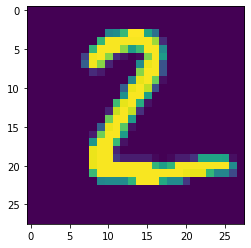

In [117]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [49]:
import numpy as np
np.argmax(model.predict(X_test[[0]]))

1/1 [==============================] - 0s 14ms/step


7

In [51]:
w1,b1 = layers[1].get_weights()
w2,b2 = layers[2].get_weights()
w3,b3 = layers[3].get_weights()

In [55]:
x = X_test[[0]].reshape(1,28*28)

In [56]:
layer1 = np.dot(x,w1) + b1
layer2 = np.dot(layer1,w2)+b2
layer3 = np.dot(layer2,w3)+b3 

In [58]:
np.argmax(layer3)

7

In [59]:
a = model.predict(X_test[[0]])

1/1 [==============================] - 0s 14ms/step


In [60]:
a

array([[5.0557860e-09, 6.6569070e-09, 2.9670460e-05, 1.2412451e-06,
        1.3498885e-10, 6.1361843e-10, 1.7827320e-15, 9.9996865e-01,
        4.8452362e-12, 5.2287106e-07]], dtype=float32)

In [61]:
layer3

array([[ -15259.636, -126042.47 ,   72387.77 ,  115863.3  , -117307.06 ,
         -40314.473, -273473.28 ,  129441.164,   24033.023,   52777.277]],
      dtype=float32)